In [1]:
# Configure Jupyter so figures appear in the notebook
import matplotlib.pyplot as plt
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [2]:
m = UNITS.meter
s = UNITS.second
kg =UNITS.kilogram

<Unit('kilogram')>

In [3]:
t_end=1e9 * s
init=State(x1=1*m,y1=1*m,z1=1*m,vx1=2000*m/s,vy1=0*m/s, vz1=0*m/s,x2=0*m,y2=5925000000*m,z2=0*m,vx2=2000*m/s,vy2=0*m/s, vz2=0*m/s)
system = System(init=init, m1=1.989e30*kg, m2=1.989e30*1.1*kg, G=6.67e-11*m*m*m/kg/s/s, t_end=t_end)

,values
init,x1 1 meter y1 ...
m1,1.989e+30 kilogram
m2,2.1879e+30 kilogram
G,6.67e-11 meter ** 3 / kilogram / second ** 2
t_end,1000000000.0 second


In [27]:
def slope_func2(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    x1,y1,z1,vx1,vy1,vz1,x2,y2,z2,vx2,vy2,vz2 = state
    unpack(system)
    velocity1=Vector(vx1,vy1,vz1)
    position1=Vector(x1,y1,z1)
    
    velocity2=Vector(vx2,vy2,vz2)
    position2=Vector(x2,y2,z2)
    radius=abs(position1-position2).mag
    radius_vector=(position1-position2)
    x_vector=(x1-x2)
    y_vector=(y1-y2)
    z_vector=(z1-z2)

    acceleration1=-(G/radius**2)*(m2)
    acceleration2=-(G/radius**2)*(m1)
    dx1dt=vx1
    dy1dt=vy1
    dz1dt=vz1
    dx2dt=vx2
    dy2dt=vy2
    dz2dt=vz2
    dvx1dt= acceleration1*(x_vector/radius_vector).mag
    dvy1dt= acceleration1*(y_vector/radius_vector).mag
    dvz1dt= acceleration1*(z_vector/radius_vector).mag
    dvx2dt= acceleration2*(x_vector/radius_vector).mag
    dvy2dt= acceleration2*(y_vector/radius_vector).mag
    dvz2dt= acceleration2*(z_vector/radius_vector).mag
    

    
    return dx1dt,dy1dt,dz1dt,dvx1dt,dvy1dt, dvz1dt,       dx2dt,dy2dt,dz2dt,dvx2dt,dvy2dt, dvz2dt

In [28]:
results, details = run_ode_solver(system, slope_func2,minStep=1e5)
details

C:\Miniconda3\lib\site-packages\scipy\integrate\_ivp\common.py:32: UserWarning: The following arguments have no effect for a chosen solver: `minStep`.
  .format(", ".join("`{}`".format(x) for x in extraneous)))


,values
sol,None
t_events,[]
nfev,194
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


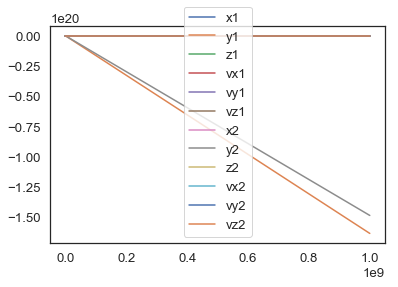

In [29]:
results.plot()

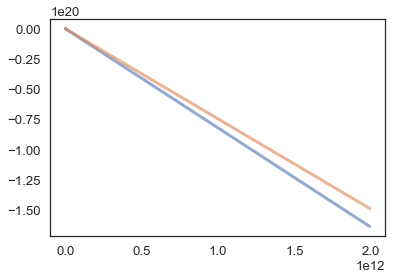

In [30]:
plot(results.x1,results.y1)
plot(results.x2,results.y2)

In [31]:
from mpl_toolkits.mplot3d import Axes3D

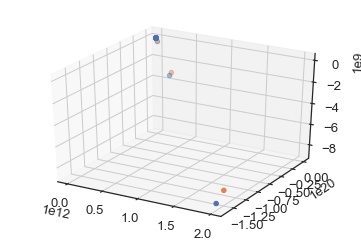

In [32]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)

# Plot a basic wireframe.
ax.scatter(results.x1, results.y1, results.z1)
ax.scatter(results.x2, results.y2, results.z2)
plt.show()


In [33]:
a=Vector(-2,2,-5)

<Quantity([-2  2 -5], 'dimensionless')>

In [34]:
b=Vector(7,3,1)

<Quantity([7 3 1], 'dimensionless')>

In [12]:
abs(a-b).mag


<Quantity(10.862780491200215, 'dimensionless')>

In [17]:
 radius_direction=(Vector(5,3,3)-Vector(5,4,2))

<Quantity([ 0 -1  1], 'dimensionless')>